In [11]:
# ============================================
# Cell 1: Imports
# ============================================

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


In [6]:
# ============================================
# Cell 2: Load Features
# ============================================

DATA_DIR = os.getcwd()
FEATURES_DIR = r"C:\Users\admin\Desktop\major major 6\major 6 final new"

# Load eGeMAPS (OpenSmile)
egemaps_features = np.load(os.path.join(FEATURES_DIR, "opensmile", "egemaps_features.npy"))
egemaps_labels   = np.load(os.path.join(FEATURES_DIR, "opensmile", "egemaps_labels.npy"))

# Load Wav2Vec2
wav2vec2_features = np.load(os.path.join(FEATURES_DIR, "wav2vec2 features", "wav2vec2_features.npy"))
wav2vec2_labels   = np.load(os.path.join(FEATURES_DIR, "wav2vec2 features", "labels.npy"))

# Load WavLM
wavlm_features = np.load(os.path.join(FEATURES_DIR, "wavLm features", "wavlm_features.npy"))
wavlm_labels   = np.load(os.path.join(FEATURES_DIR, "wavLm features", "wavlm_labels.npy"))

# Store in a dictionary for iteration
feature_sets = {
    "egemaps": (egemaps_features, egemaps_labels),
    "wav2vec2": (wav2vec2_features, wav2vec2_labels),
    "wavlm": (wavlm_features, wavlm_labels)
}


In [12]:
# ============================================
# Cell 3: Define Models
# ============================================

models = {
    "ANN": MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(256,128),
                         learning_rate='constant', solver='adam', max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform'),
    "LogisticRegression": LogisticRegression(C=0.01, max_iter=500, penalty='l2', solver='lbfgs'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [13]:
# ============================================
# Cell 4: CNN Definition
# ============================================

class SimpleCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleCNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



🎯 Feature set: egemaps

➡️ Training ANN...


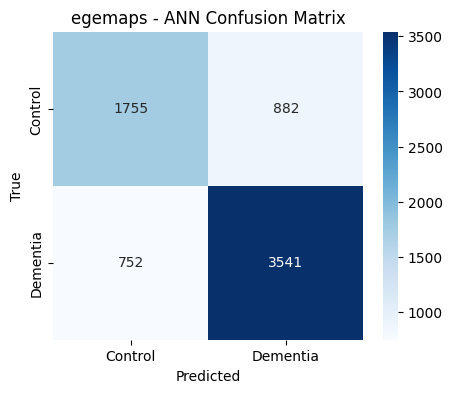

              precision    recall  f1-score   support

           0      0.700     0.666     0.682      2637
           1      0.801     0.825     0.813      4293

    accuracy                          0.764      6930
   macro avg      0.750     0.745     0.747      6930
weighted avg      0.762     0.764     0.763      6930


➡️ Training KNN...


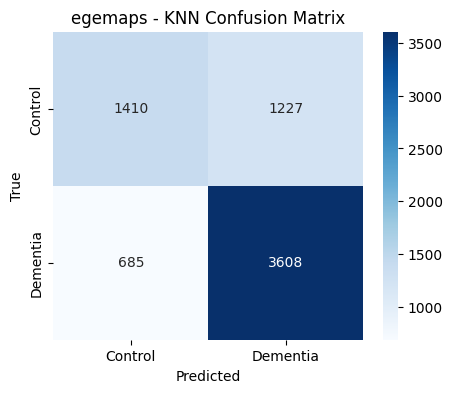

              precision    recall  f1-score   support

           0      0.673     0.535     0.596      2637
           1      0.746     0.840     0.791      4293

    accuracy                          0.724      6930
   macro avg      0.710     0.688     0.693      6930
weighted avg      0.718     0.724     0.716      6930


➡️ Training LogisticRegression...


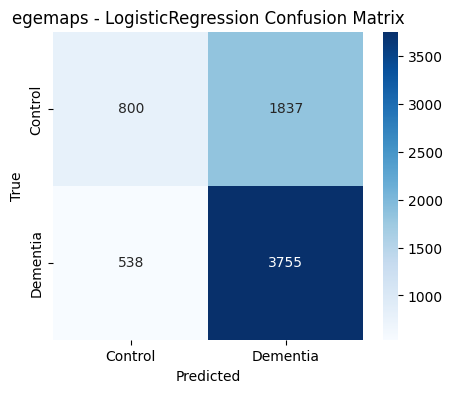

              precision    recall  f1-score   support

           0      0.598     0.303     0.403      2637
           1      0.671     0.875     0.760      4293

    accuracy                          0.657      6930
   macro avg      0.635     0.589     0.581      6930
weighted avg      0.643     0.657     0.624      6930


➡️ Training XGBoost...


c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

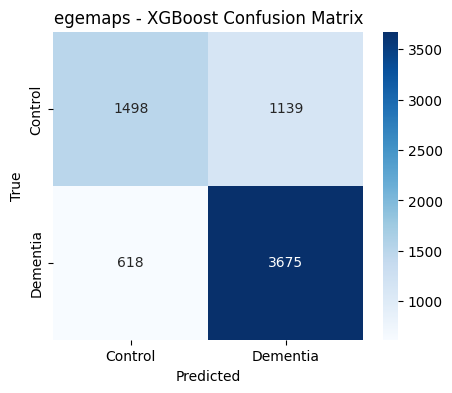

              precision    recall  f1-score   support

           0      0.708     0.568     0.630      2637
           1      0.763     0.856     0.807      4293

    accuracy                          0.746      6930
   macro avg      0.736     0.712     0.719      6930
weighted avg      0.742     0.746     0.740      6930


➡️ Training AdaBoost...


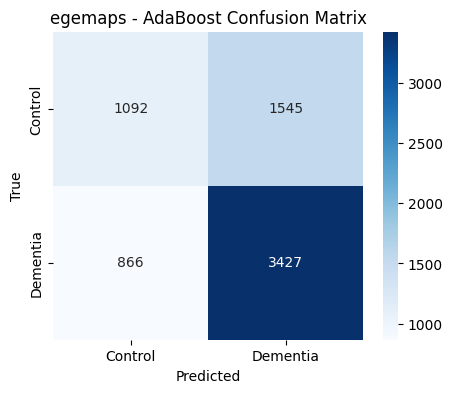

              precision    recall  f1-score   support

           0      0.558     0.414     0.475      2637
           1      0.689     0.798     0.740      4293

    accuracy                          0.652      6930
   macro avg      0.623     0.606     0.608      6930
weighted avg      0.639     0.652     0.639      6930


➡️ Training SVM...


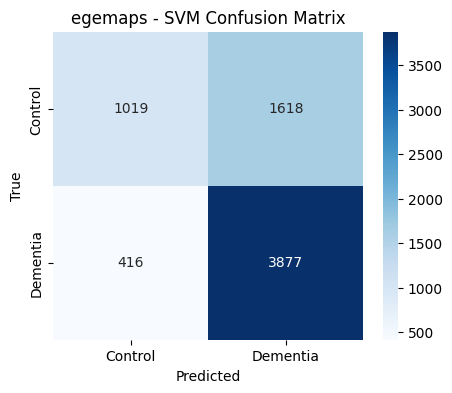

              precision    recall  f1-score   support

           0      0.710     0.386     0.500      2637
           1      0.706     0.903     0.792      4293

    accuracy                          0.706      6930
   macro avg      0.708     0.645     0.646      6930
weighted avg      0.707     0.706     0.681      6930


➡️ Training RandomForest...


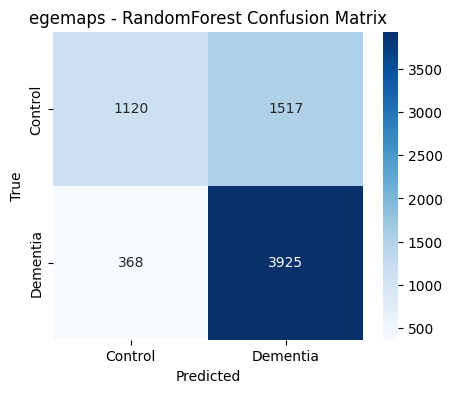

              precision    recall  f1-score   support

           0      0.753     0.425     0.543      2637
           1      0.721     0.914     0.806      4293

    accuracy                          0.728      6930
   macro avg      0.737     0.670     0.675      6930
weighted avg      0.733     0.728     0.706      6930


🎯 Feature set: wav2vec2

➡️ Training ANN...


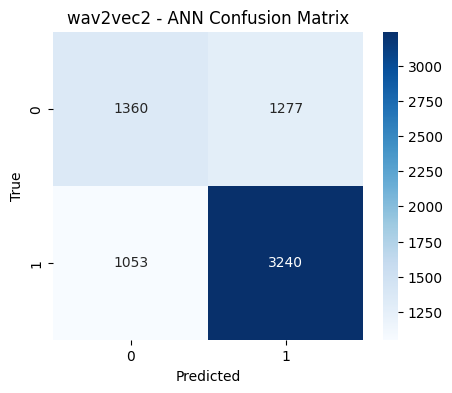

              precision    recall  f1-score   support

           0      0.564     0.516     0.539      2637
           1      0.717     0.755     0.736      4293

    accuracy                          0.664      6930
   macro avg      0.640     0.635     0.637      6930
weighted avg      0.659     0.664     0.661      6930


➡️ Training KNN...


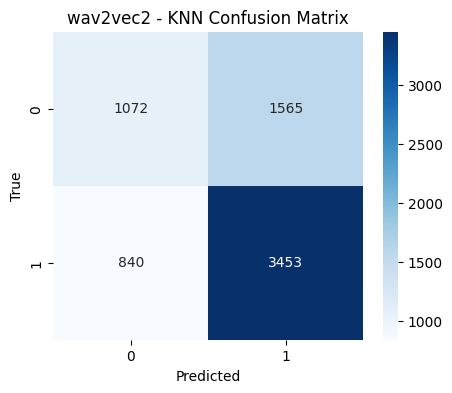

              precision    recall  f1-score   support

           0      0.561     0.407     0.471      2637
           1      0.688     0.804     0.742      4293

    accuracy                          0.653      6930
   macro avg      0.624     0.605     0.607      6930
weighted avg      0.640     0.653     0.639      6930


➡️ Training LogisticRegression...


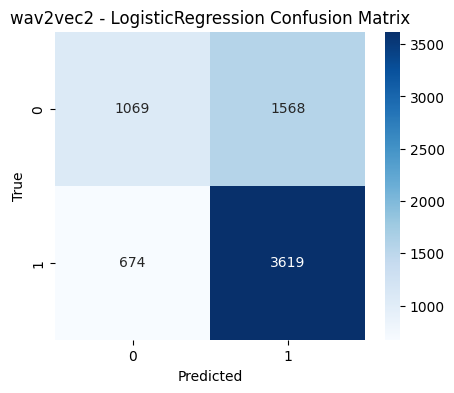

              precision    recall  f1-score   support

           0      0.613     0.405     0.488      2637
           1      0.698     0.843     0.764      4293

    accuracy                          0.676      6930
   macro avg      0.656     0.624     0.626      6930
weighted avg      0.666     0.676     0.659      6930


➡️ Training XGBoost...


c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

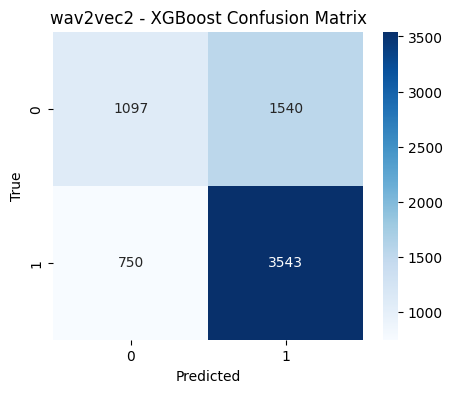

              precision    recall  f1-score   support

           0      0.594     0.416     0.489      2637
           1      0.697     0.825     0.756      4293

    accuracy                          0.670      6930
   macro avg      0.645     0.621     0.623      6930
weighted avg      0.658     0.670     0.654      6930


➡️ Training AdaBoost...


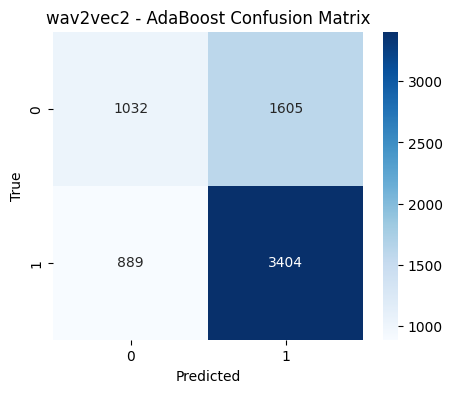

              precision    recall  f1-score   support

           0      0.537     0.391     0.453      2637
           1      0.680     0.793     0.732      4293

    accuracy                          0.640      6930
   macro avg      0.608     0.592     0.592      6930
weighted avg      0.625     0.640     0.626      6930


➡️ Training SVM...


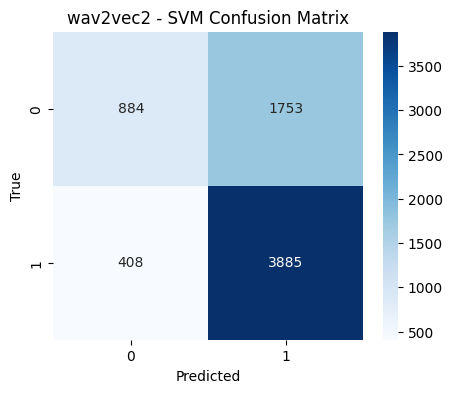

              precision    recall  f1-score   support

           0      0.684     0.335     0.450      2637
           1      0.689     0.905     0.782      4293

    accuracy                          0.688      6930
   macro avg      0.687     0.620     0.616      6930
weighted avg      0.687     0.688     0.656      6930


➡️ Training RandomForest...


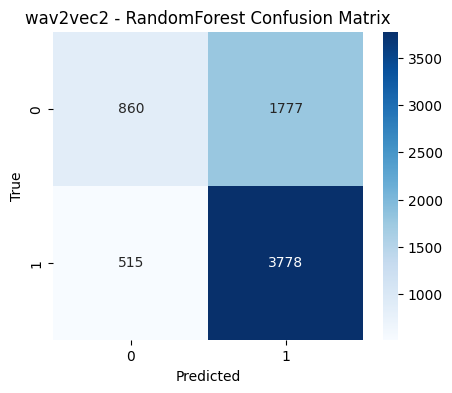

              precision    recall  f1-score   support

           0      0.625     0.326     0.429      2637
           1      0.680     0.880     0.767      4293

    accuracy                          0.669      6930
   macro avg      0.653     0.603     0.598      6930
weighted avg      0.659     0.669     0.638      6930


🎯 Feature set: wavlm

➡️ Training ANN...


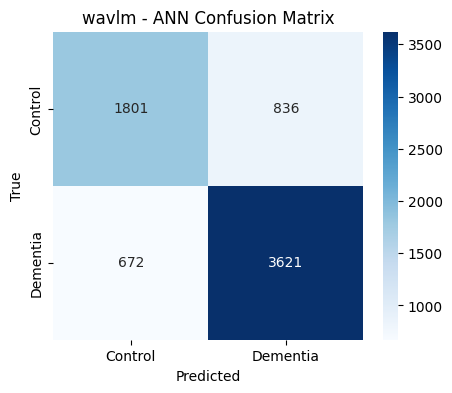

              precision    recall  f1-score   support

           0      0.728     0.683     0.705      2637
           1      0.812     0.843     0.828      4293

    accuracy                          0.782      6930
   macro avg      0.770     0.763     0.766      6930
weighted avg      0.780     0.782     0.781      6930


➡️ Training KNN...


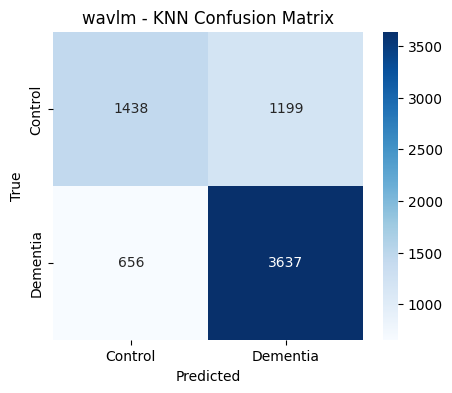

              precision    recall  f1-score   support

           0      0.687     0.545     0.608      2637
           1      0.752     0.847     0.797      4293

    accuracy                          0.732      6930
   macro avg      0.719     0.696     0.702      6930
weighted avg      0.727     0.732     0.725      6930


➡️ Training LogisticRegression...


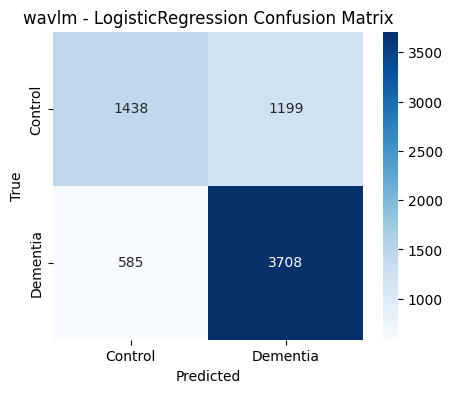

              precision    recall  f1-score   support

           0      0.711     0.545     0.617      2637
           1      0.756     0.864     0.806      4293

    accuracy                          0.743      6930
   macro avg      0.733     0.705     0.712      6930
weighted avg      0.739     0.743     0.734      6930


➡️ Training XGBoost...


c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [11:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [11:24:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\admin\Desktop\major major 6\major 6 final new\agraja_env\lib\site-packages\xgboost\core.py:158: UserWarning: [11:24:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parame

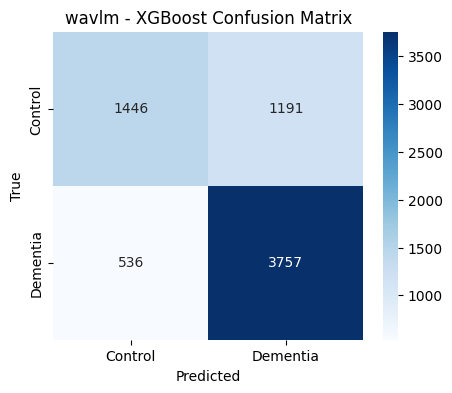

              precision    recall  f1-score   support

           0      0.730     0.548     0.626      2637
           1      0.759     0.875     0.813      4293

    accuracy                          0.751      6930
   macro avg      0.744     0.712     0.720      6930
weighted avg      0.748     0.751     0.742      6930


➡️ Training AdaBoost...


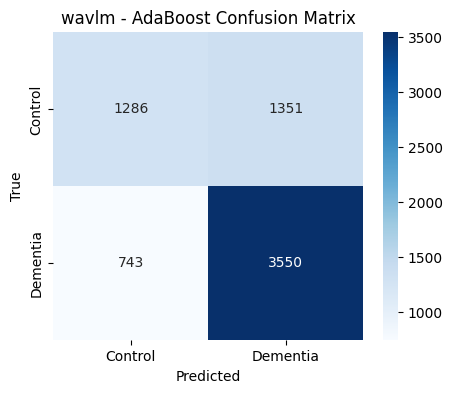

              precision    recall  f1-score   support

           0      0.634     0.488     0.551      2637
           1      0.724     0.827     0.772      4293

    accuracy                          0.698      6930
   macro avg      0.679     0.657     0.662      6930
weighted avg      0.690     0.698     0.688      6930


➡️ Training SVM...


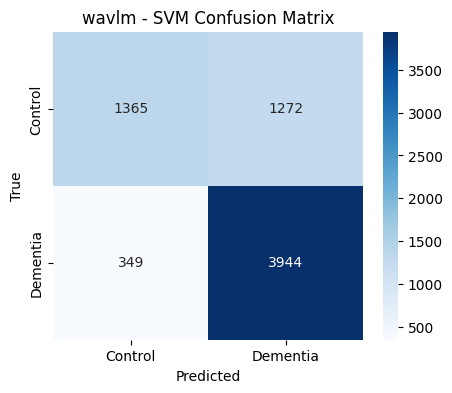

              precision    recall  f1-score   support

           0      0.796     0.518     0.627      2637
           1      0.756     0.919     0.830      4293

    accuracy                          0.766      6930
   macro avg      0.776     0.718     0.728      6930
weighted avg      0.771     0.766     0.753      6930


➡️ Training RandomForest...


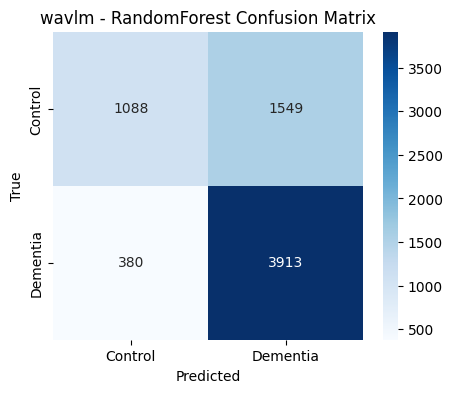

              precision    recall  f1-score   support

           0      0.741     0.413     0.530      2637
           1      0.716     0.911     0.802      4293

    accuracy                          0.722      6930
   macro avg      0.729     0.662     0.666      6930
weighted avg      0.726     0.722     0.699      6930



In [14]:
# ============================================
# Cell 5: 10-Fold Cross Validation (Sklearn Models)
# ============================================

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for feature_name, (X, y) in feature_sets.items():
    print(f"\n==========================")
    print(f"🎯 Feature set: {feature_name}")
    print(f"==========================")

    # Label encode
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create folder for models
    save_dir = os.path.join("saved_models", feature_name)
    os.makedirs(save_dir, exist_ok=True)

    for model_name, model in models.items():
        print(f"\n➡️ Training {model_name}...")
        all_true, all_pred = [], []

        for train_idx, test_idx in kf.split(X_scaled, y_encoded):
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            all_true.extend(y_test)
            all_pred.extend(y_pred)

        # Confusion Matrix
        cm = confusion_matrix(all_true, all_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel("Predicted"); plt.ylabel("True")
        plt.title(f"{feature_name} - {model_name} Confusion Matrix")
        plt.show()

        # Classification Report
        print(classification_report(all_true, all_pred, digits=3))

        # Save model
        joblib.dump(model, os.path.join(save_dir, f"{model_name}.pkl"))
    # Save label encoder and scaler
    joblib.dump(le, os.path.join(save_dir, "label_encoder.pkl"))
    joblib.dump(scaler, os.path.join(save_dir, "scaler.pkl"))
